In [3]:
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [7]:
df = pd.read_parquet('./data/SPY.parquet')
df = df.set_index('timestamp')
df

,open,high,low,close,volume,vwap,transactions
timestamp,,,,,,,
2022-01-03 18:00:00,476.3800,477.25,476.3800,477.25,57805,476.8048,556.0
2022-01-03 19:00:00,477.2400,477.76,477.1500,477.76,36501,477.5092,395.0
2022-01-03 20:00:00,477.7600,478.09,477.7600,478.00,74462,477.9857,492.0
2022-01-03 21:00:00,478.0200,478.06,477.3300,477.41,156478,477.6712,1402.0
2022-01-03 22:00:00,477.9504,477.99,476.5300,476.56,517794,477.2607,2844.0
...,...,...,...,...,...,...,...
2023-07-19 04:00:00,454.1550,454.86,453.8398,454.19,22995200,453.9121,134107.0
2023-07-19 05:00:00,454.1800,454.19,453.0000,453.77,14006354,453.9617,5562.0
2023-07-19 06:00:00,453.8700,453.87,453.7300,453.73,813417,454.1588,521.0


<Axes: xlabel='timestamp'>

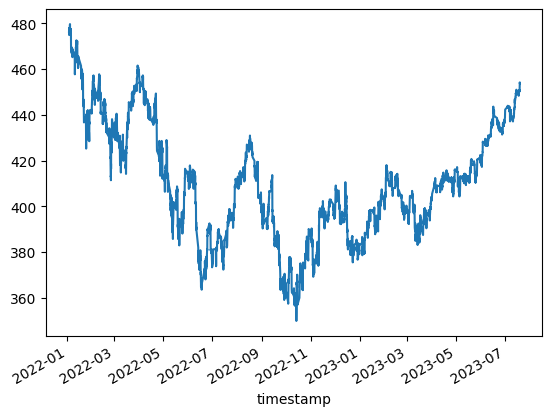

In [9]:
df['open'].plot()

<Axes: ylabel='Frequency'>

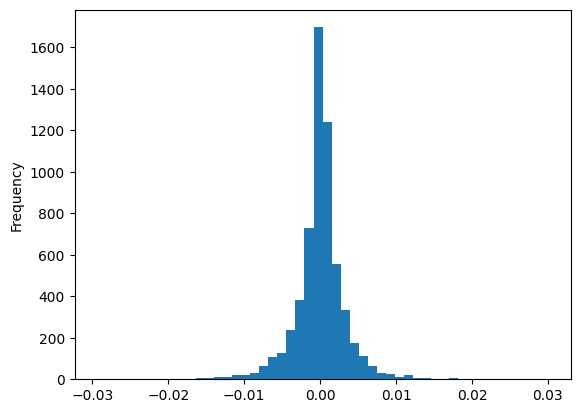

In [10]:
df['close'].pct_change().plot.hist(bins=50)